In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
order_details=pd.read_csv(r"C:\Users\XELFMARS\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv", encoding="latin-1")
orders=pd.read_csv(r"C:\Users\XELFMARS\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv", encoding="latin-1")
pizza_types=pd.read_csv(r"C:\Users\XELFMARS\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin-1")
pizzas=pd.read_csv(r"C:\Users\XELFMARS\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding="latin-1")

### PRELIMINARY DATA ANALYSIS

In [3]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
order_details.info()
order_details.shape

#checking to see if null entities or duplicates exist in order_details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


(48620, 4)

In [8]:
order_details.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [9]:
order_details.duplicated().sum()

np.int64(0)

In [10]:
orders.info()
orders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


(21350, 3)

In [11]:
pizza_types.info()
pizza_types.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


(32, 4)

In [12]:
pizzas.info()
pizzas.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


(96, 4)

#### the datasets do not contain any null objects

In [13]:
#TO ADD COLUMN of date and time into one for easy conversion into datetime format
orders['DateTime']=(orders['date']+' '+orders['time'])
orders

,order_id,date,time,DateTime
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40
2,3,2015-01-01,12:12:28,2015-01-01 12:12:28
3,4,2015-01-01,12:16:31,2015-01-01 12:16:31
4,5,2015-01-01,12:21:30,2015-01-01 12:21:30
...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12-31 20:51:07
21346,21347,2015-12-31,21:14:37,2015-12-31 21:14:37
21347,21348,2015-12-31,21:23:10,2015-12-31 21:23:10
21348,21349,2015-12-31,22:09:54,2015-12-31 22:09:54


In [14]:
#To convert into datetime format
orders['DateTime']=pd.to_datetime(orders['DateTime'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  object        
 2   time      21350 non-null  object        
 3   DateTime  21350 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 667.3+ KB


In [15]:
#Merging the order_datails and orders dataset on order_id column

first_merge=pd.merge(order_details, orders, on= 'order_id')
first_merge

,order_details_id,order_id,pizza_id,quantity,date,time,DateTime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40
...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,2015-12-31 21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,2015-12-31 21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,2015-12-31 21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,2015-12-31 22:09:54


In [16]:
order_details['quantity'].value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [17]:
#Merging the pizza_types and pizzas datasete on the pizza_type_id column

second_merge=pd.merge(pizza_types, pizzas, on='pizza_type_id')
second_merge

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75
...,...,...,...,...,...,...,...
91,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_m,M,16.00
92,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_l,L,20.25
93,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_s,S,12.00
94,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_m,M,16.00


In [18]:
#merging all the merged datasets on the pizza_id column

full_data=pd.merge(first_merge, second_merge, on='pizza_id')
full_data

,order_details_id,order_id,pizza_id,quantity,date,time,DateTime,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,2015-01-01 11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,2015-12-31 21:23:10,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,2015-12-31 21:23:10,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,2015-12-31 21:23:10,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,2015-12-31 22:09:54,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25


## What is the total revenue/sales?

In [19]:

print(f"The total revenue/sales for the year is $ {full_data['price'].sum():.2f}")

The total revenue/sales for the year is $ 801944.70


## Find the total quantity sold.


In [20]:
print(f"The total quantity of pizza sold for the year is {full_data['quantity'].sum()}")

The total quantity of pizza sold for the year is 49574


## Find the total orders.

In [21]:
print(f"The total number of distinct orders for the year is {len(full_data)}")

#This gives the total number of orders for each items bought
#but doesn't reflect how many actual orders were made by customers at at time, we can show this using groupby

The total number of distinct orders for the year is 48620


In [22]:
data_by_order=full_data.groupby('order_id')['quantity'].sum().reset_index()
data_by_order

,order_id,quantity
0,1,1
1,2,5
2,3,2
3,4,1
4,5,1
...,...,...
21345,21346,4
21346,21347,4
21347,21348,3
21348,21349,1


In [23]:
#Now the actual total number of orders is 
print(f"The total number of orders per person for the year is {len(data_by_order)}")

The total number of orders per person for the year is 21350


## How many pizza types do they sell?


In [24]:
print(f"The pizza shop sells a total of {full_data['pizza_id'].value_counts().count()} pizzas types, with sizes in Small, Medium and Big")

The pizza shop sells a total of 91 pizzas types, with sizes in Small, Medium and Big


## Find the average price of the pizzas.

In [25]:
prices=full_data['price'].value_counts().reset_index()
prices

,price,count
0,20.75,8685
1,12.00,5600
2,16.00,4474
3,16.75,4294
4,16.50,4040
5,12.50,3328
6,20.25,3032
7,12.75,2507
8,20.50,1998
9,18.50,1359


In [26]:
print(f"The average price of the pizzas sold is $ {prices['price'].mean():.2f}")

The average price of the pizzas sold is $ 17.02


## What are the peak hours of sales?


In [27]:
#Genarate a table showing top 10 hour of sales and its count per hour

hour_of_sales=full_data['DateTime'].dt.strftime('%I %p').str.lstrip("0")
peak_hours=hour_of_sales.value_counts().reset_index()[:10]
peak_hours

,DateTime,count
0,12 PM,6543
1,1 PM,6203
2,6 PM,5359
3,5 PM,5143
4,7 PM,4350
5,4 PM,4185
6,2 PM,3521
7,8 PM,3487
8,3 PM,3170
9,11 AM,2672


In [28]:
hour_of_sales=hour_of_sales.reset_index()

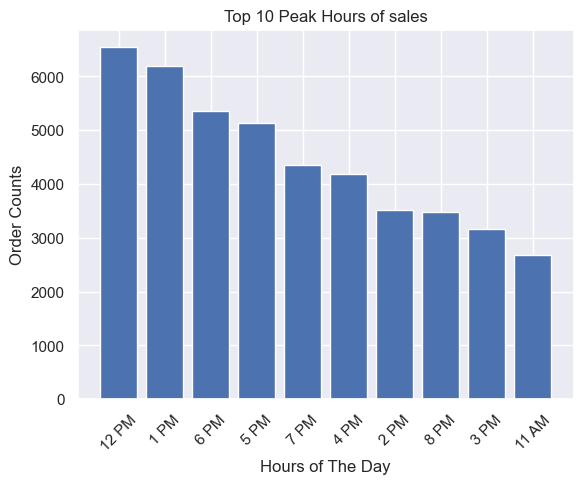

In [29]:
plt.bar(peak_hours['DateTime'], peak_hours['count'])
plt.xlabel('Hours of The Day')
plt.title('Top 10 Peak Hours of sales')
plt.ylabel('Order Counts')
plt.xticks(rotation=45)
plt.show()

#### From the given chart, it is clear that the most number of sales are made during Mid-day or Noon (12 PM), followed by 1 PM then 6 PM and so on

## Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [30]:
#Group the total number of sales by the day of the week 

day_of_sales=full_data['DateTime'].dt.day_name().value_counts()
order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_sales=day_of_sales.reindex(order)
day_of_sales

DateTime
Sunday       5917
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Name: count, dtype: int64

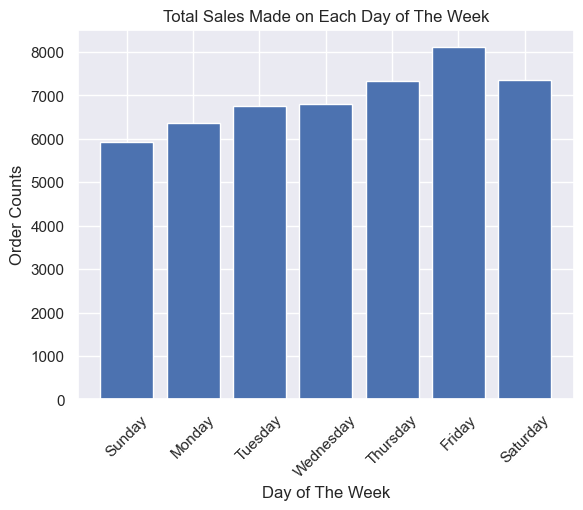

The most sales with a total of 8106 is made on Fridays


In [31]:
plt.bar(day_of_sales.index, day_of_sales.values)
plt.xlabel('Day of The Week')
plt.title('Total Sales Made on Each Day of The Week')
plt.ylabel('Order Counts')
plt.xticks(rotation=45)
plt.show()\


print(f'The most sales with a total of {day_of_sales.max()} is made on {day_of_sales.idxmax()}s')

#### The highest number of sales (8106) are made on a Friday

## Find the top 5 bestselling pizzas.

In [32]:
#Group the top 5 selling pizzas by sales count

best_selling=full_data['name'].value_counts()[0:5]
best_selling

name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: count, dtype: int64

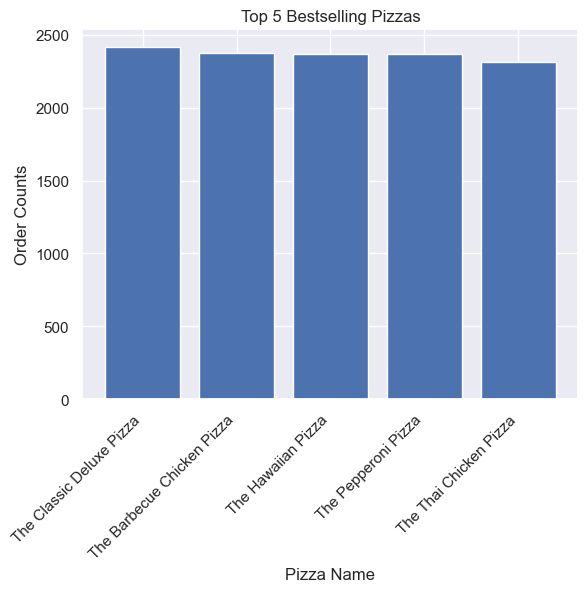

The 5 top bestselling pizzas are The Classic Deluxe Pizza, The Barbecue Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza and The Thai Chicken Pizza


In [33]:
plt.bar(best_selling.index, best_selling.values)
plt.xlabel('Pizza Name')
plt.title('Top 5 Bestselling Pizzas')
plt.ylabel('Order Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

top_pizza_list=list(best_selling.index)
top_pizza_list=", ".join(top_pizza_list[0:4]) + " and " + top_pizza_list[-1]
print(f'The 5 top bestselling pizzas are {top_pizza_list}')

#### The 5 top bestselling pizzas are The Classic Deluxe Pizza, The Barbecue Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza and The Thai Chicken Pizza

## Find the sales made in each month. Any trend noticeable?

In [34]:
#Group the days of the month by sales count
full_data['month_of_sales']=full_data['DateTime'].dt.month_name()
month_of_sales=full_data['DateTime'].dt.month_name()
month_of_sales.value_counts()

DateTime
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: count, dtype: int64

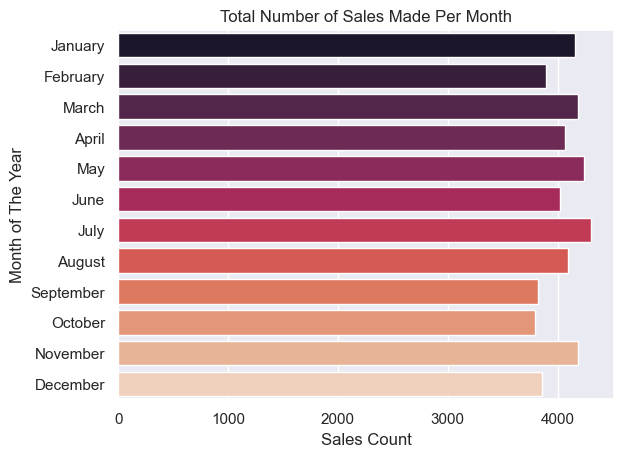

In [35]:
sns.countplot(data=month_of_sales, palette='rocket')
plt.xlabel('Sales Count')
plt.title('Total Number of Sales Made Per Month')
plt.ylabel('Month of The Year')

plt.show()

#### The total number of sales made per month are fairly within range of eachother awitth the most amount of sales being in July

In [36]:
#group the months by total revenue made in that month
monthly_sales = full_data.groupby('month_of_sales')['price'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_sales

month_of_sales
January      68472.70
February     64067.40
March        69198.00
April        67286.20
May          69939.35
June         66796.30
July         71027.45
August       67068.80
September    63018.00
October      62566.50
November     69054.00
December     63450.00
Name: price, dtype: float64

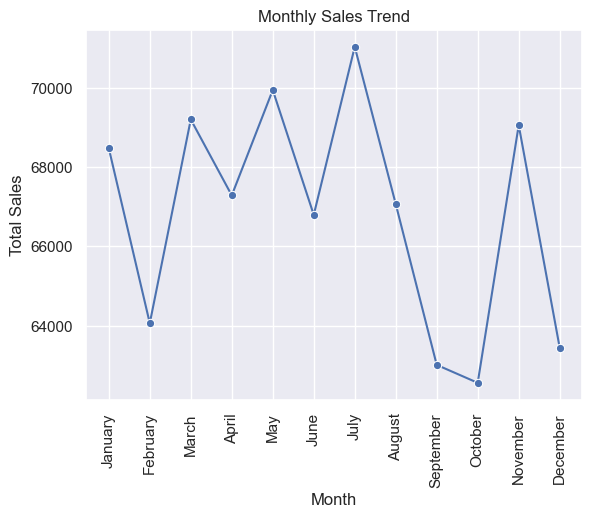

In [37]:
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#### It is observed that the most money was made in July with the least amount of money from sales made in October

## Are there pizza types that are not doing well on the menu?


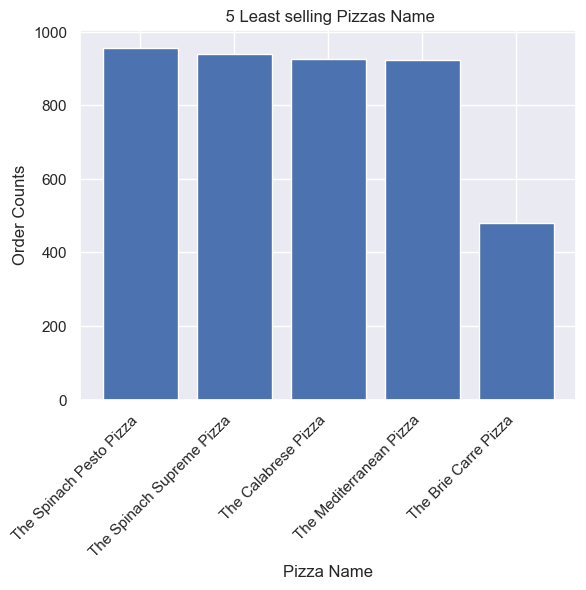

In [38]:
#First , I grouped the pizzas by pizza name and not the eaxct pizza type to see the least 5 perfoming pizza

least_selling=full_data['name'].value_counts()[-5:]
plt.bar(least_selling.index, least_selling.values)
plt.xlabel('Pizza Name')
plt.title(' 5 Least selling Pizzas Name')
plt.ylabel('Order Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Th least performing pizza name is the Brie Carre Pizza

In [39]:
#Then i grouped thw least 10 perfoming pizza type, this includes pizza names and size

pizza_type=full_data['pizza_id'].value_counts()

least_performing_10=pizza_type[-10:]
least_performing_10

pizza_id
spinach_supr_m    266
the_greek_l       255
ital_supr_s       194
ital_veggie_l     190
ckn_alfredo_l     187
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: count, dtype: int64

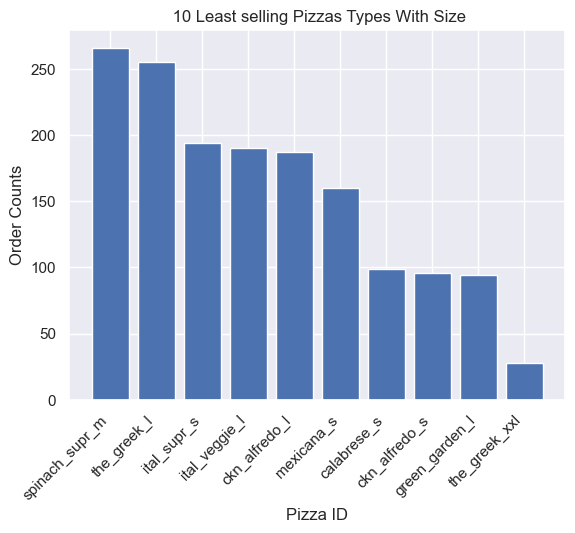

In [40]:

plt.bar(least_performing_10.index, least_performing_10.values)
plt.xlabel('Pizza ID')
plt.title(' 10 Least selling Pizzas Types With Size')
plt.ylabel('Order Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

#### The pizza types not performing well in particular are the calabrese_s with 99 sales ,ckn_alfredo_s with 96 sales, green_garden_l with 94 and the_greek_xxl with 28 sales

## WEEKLY SALES TREND

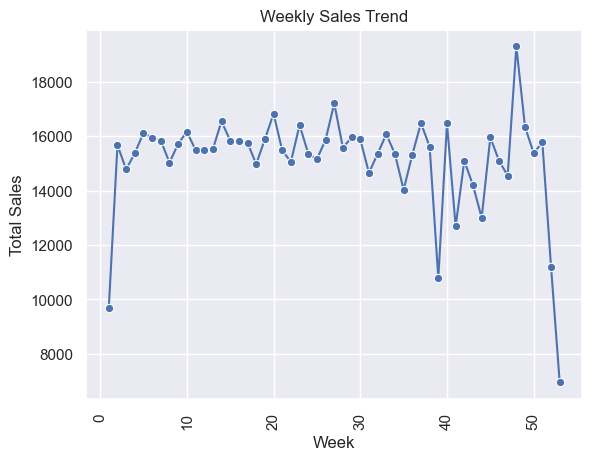

In [41]:
#group the months by total revenue made in that Wweek
full_data['week_of_sales']=full_data['DateTime'].dt.isocalendar().week
week_of_sales = full_data.groupby('week_of_sales')['price'].sum()


sns.lineplot(x=week_of_sales.index, y=week_of_sales.values, marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#### The highest revenue was made in week 48

## Are weekdays slower than weekends?

In [42]:
full_data['day_of_week']=full_data['DateTime'].dt.day_name()

In [43]:
full_data['day_type']=full_data['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
full_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,DateTime,pizza_type_id,name,category,ingredients,size,price,month_of_sales,week_of_sales,day_of_week,day_type
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,2015-01-01 11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,January,1,Thursday,Weekday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,January,1,Thursday,Weekday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,January,1,Thursday,Weekday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,2015-01-01 11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,January,1,Thursday,Weekday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,2015-01-01 11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,January,1,Thursday,Weekday


In [53]:
daytype_quant = full_data.groupby('day_type')['quantity'].sum()
daytype_quant

day_type
Weekday    36046
Weekend    13528
Name: quantity, dtype: int64

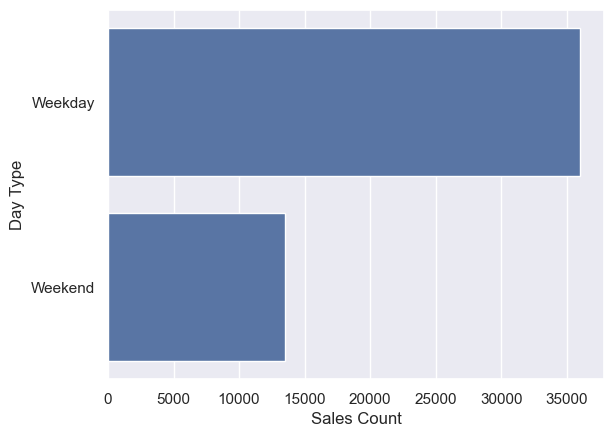

In [54]:
sns.barplot(x=daytype_quant.values , y=daytype_quant.index)
plt.ylabel('Day Type')
plt.xlabel('Sales Count')
plt.show()

#### This shows that more pizzas are sold during weekdays , which is to be expected as weekdays consist of 5 days

In [50]:
daytype_sales = full_data.groupby('day_type')['price'].mean()
daytype_sales

day_type
Weekday    16.516200
Weekend    16.435356
Name: price, dtype: float64

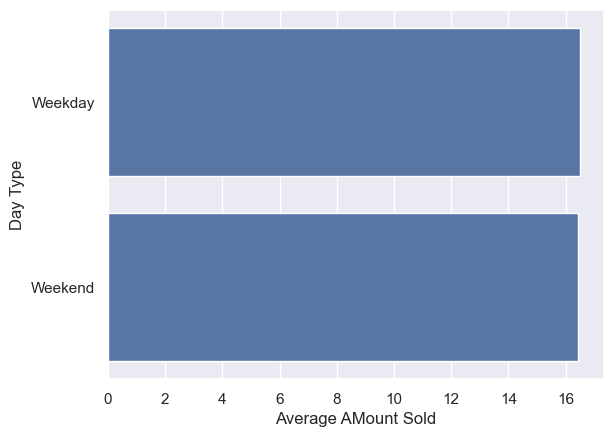

In [55]:
sns.barplot(x=daytype_sales.values , y=daytype_sales.index)
plt.ylabel('Day Type')
plt.xlabel('Average AMount Sold')
plt.show()

#### The bar chart above shows that despite the lower number of sales during weekends , the average amount of sales compared to the weekday is actually almost same
